### Generating Overfit Tree Models

By default, you scikitlearn tree models will grow until every node is pure.  To explore this, you are to build different models using the `max_depth` parameter and determine when the tree begins to overfit the data.  For depths from `max_depth = 1` until the tree is completed, keep track of the accuracy on training vs. test data and generate a plot with depths as the horizontal axis and accuracy as the vertical axis for train and test data.  

Repeat this process with different splits of the data to determine at what depth the tree begins to overfit.  Share your results with your peers and discuss your approach to generating the visualization.  What are the consequences of this overfitting for your approach to building Decision Trees?   We provide a small dataset with health data where your goal is to predict whether or not the individuals survive.

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import set_config

set_config("diagram")

In [78]:
data = pd.read_csv('data/Whickham.txt')

In [79]:
data.head()

,outcome,smoker,age
0,Alive,Yes,23
1,Alive,Yes,18
2,Dead,Yes,71
3,Alive,No,67
4,Alive,No,64


In [80]:
data['smoker'] = data['smoker'].map({'Yes':1,'No':0})
X = data[['smoker', 'age']]
y = data['outcome'].map({'Alive':1,'Dead':0})


X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y)#, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.25, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.30, random_state=42)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.35, random_state=42)

nums = list(range(1,16))

# Split = 80/20 Train/Test

In [81]:
train_accuracy_scores1 = []
test_accuracy_scores1 = []

for n in nums:
    tree = DecisionTreeClassifier(max_depth = n).fit(X_train1, y_train1)
    #tree_plot = plot_tree(tree, feature_names=list(X.columns), filled = True)
    #print(tree_plot)
    train_predictions = tree.predict(X_train1)
    train_accuracy_scores1.append(accuracy_score(train_predictions, y_train1))

    test_predictions = tree.predict(X_test1)
    test_accuracy_scores1.append(accuracy_score(test_predictions, y_test1))



# Split = 75/25

In [82]:
train_accuracy_scores2 = []
test_accuracy_scores2 = []

for n in nums:
    tree = DecisionTreeClassifier(max_depth = n).fit(X_train2, y_train2)
    #tree_plot = plot_tree(tree, feature_names=list(X.columns), filled = True)
    #print(tree_plot)
    train_predictions = tree.predict(X_train2)
    train_accuracy_scores2.append(accuracy_score(train_predictions, y_train2))

    test_predictions = tree.predict(X_test2)
    test_accuracy_scores2.append(accuracy_score(test_predictions, y_test2))

# Split = 70/30

In [83]:
train_accuracy_scores3 = []
test_accuracy_scores3 = []

for n in nums:
    tree = DecisionTreeClassifier(max_depth = n).fit(X_train3, y_train3)
    #tree_plot = plot_tree(tree, feature_names=list(X.columns), filled = True)
    #print(tree_plot)
    train_predictions = tree.predict(X_train3)
    train_accuracy_scores3.append(accuracy_score(train_predictions, y_train3))

    test_predictions = tree.predict(X_test3)
    test_accuracy_scores3.append(accuracy_score(test_predictions, y_test3))


# Split = 65/35

In [84]:
train_accuracy_scores4 = []
test_accuracy_scores4 = []

for n in nums:
    tree = DecisionTreeClassifier(max_depth = n).fit(X_train4, y_train4)
    #tree_plot = plot_tree(tree, feature_names=list(X.columns), filled = True)
    #print(tree_plot)
    train_predictions = tree.predict(X_train4)
    train_accuracy_scores4.append(accuracy_score(train_predictions, y_train4))

    test_predictions = tree.predict(X_test4)
    test_accuracy_scores4.append(accuracy_score(test_predictions, y_test4))

# Plots

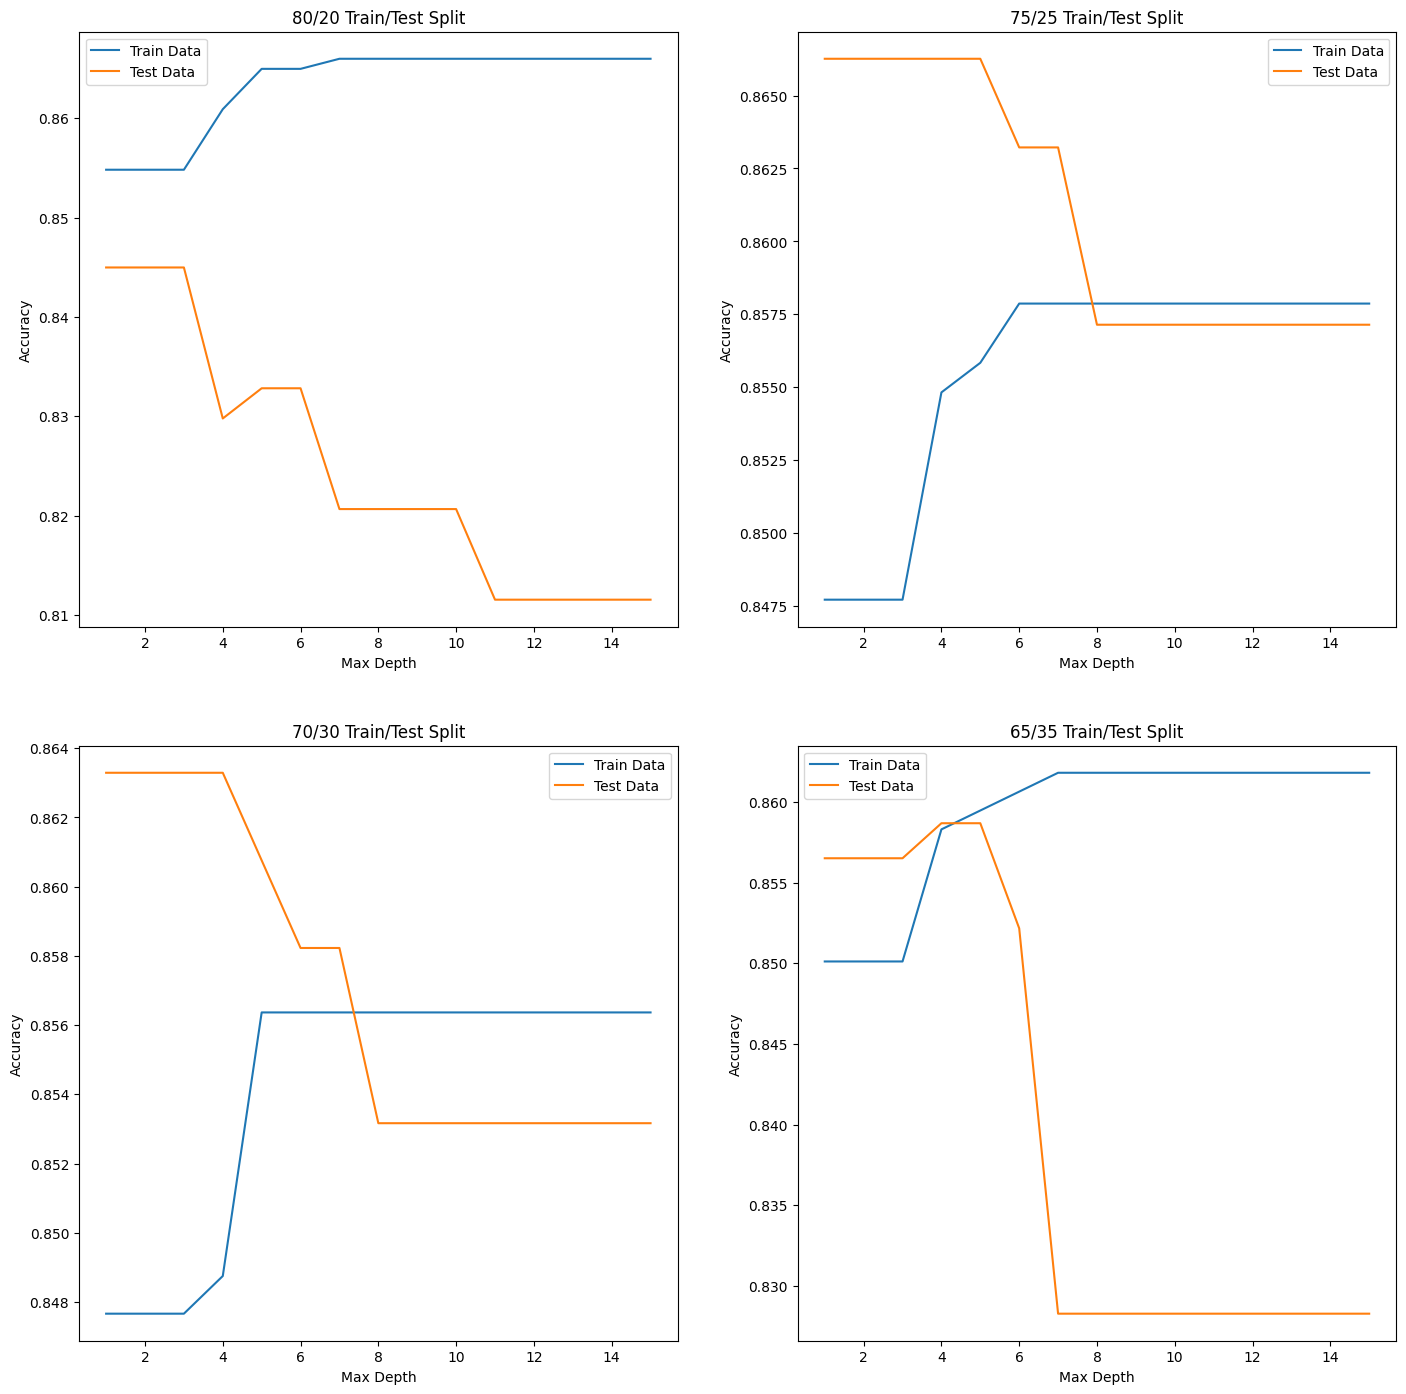

In [99]:

fig, axs = plt.subplots(2, 2,figsize=(17,17))
axs[0, 0].plot(nums,train_accuracy_scores1,label='Train Data')
axs[0, 0].plot(nums,test_accuracy_scores1,label='Test Data')
axs[0, 0].set_title('80/20 Train/Test Split')
axs[0, 0].legend()

axs[0, 1].plot(nums,train_accuracy_scores2,label='Train Data')
axs[0, 1].plot(nums,test_accuracy_scores2,label='Test Data')
axs[0, 1].set_title('75/25 Train/Test Split')
axs[0, 1].legend()

axs[1, 0].plot(nums,train_accuracy_scores3,label='Train Data')
axs[1, 0].plot(nums,test_accuracy_scores3,label='Test Data')
axs[1, 0].set_title('70/30 Train/Test Split')
axs[1, 0].legend()

axs[1, 1].plot(nums,train_accuracy_scores4,label='Train Data')
axs[1, 1].plot(nums,test_accuracy_scores4,label='Test Data')
axs[1, 1].set_title('65/35 Train/Test Split')
axs[1, 1].legend()

for ax in axs.flat:
    ax.set(xlabel='Max Depth', ylabel='Accuracy')
    #ax.label_outer()
